In [65]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Input , SimpleRNN  , LSTM
from tensorflow.keras.optimizers import SGD, Adam

In [47]:
series = np.sin((0.1*np.arange(1000))**2) 

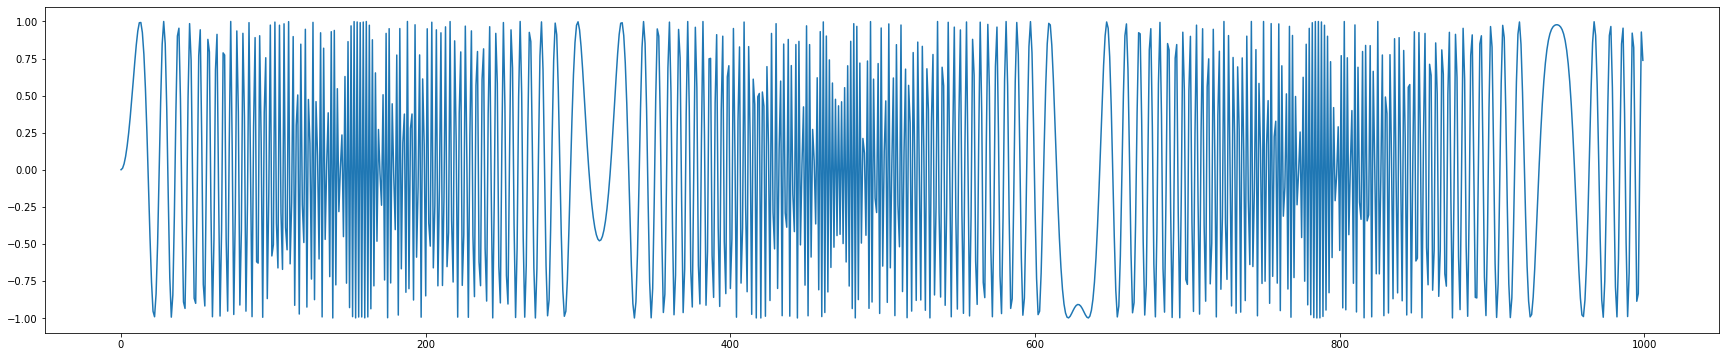

In [48]:
plt.rcParams["figure.figsize"] = (30,6)
plt.plot(series)

# Linear Autoregressive Model 

In [49]:
T = 20

X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [50]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y)

In [51]:
X.shape

(980, 20)

In [52]:
Y.shape

(980,)

In [53]:
N = len(X)
N

980

In [54]:
i = Input(shape=(X[0].shape))
x = Dense(1)(i)

model = Model(i,x)

model.compile(optimizer = Adam(lr=0.1) , loss = 'mse')

r = model.fit(X[:N//2] , Y[:N//2] , epochs = 80 , validation_data=(X[N//2:] , Y[N//2:]))

Epoch 1/80
16/16 [==============================] - 0s 7ms/step - loss: 0.7721 - val_loss: 1.1265
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5320 - val_loss: 1.0157
Epoch 3/80
16/16 [==============================] - 0s 3ms/step - loss: 0.5092 - val_loss: 1.0363
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5068 - val_loss: 1.0025
Epoch 5/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5125 - val_loss: 0.9328
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5414 - val_loss: 0.9650
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5329 - val_loss: 0.9375
Epoch 8/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5195 - val_loss: 0.9777
Epoch 9/80
16/16 [==============================] - 0s 3ms/step - loss: 0.5194 - val_loss: 1.0537
Epoch 10/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5046 - val_loss: 0.9386
Epoch 11/80
16/16 [

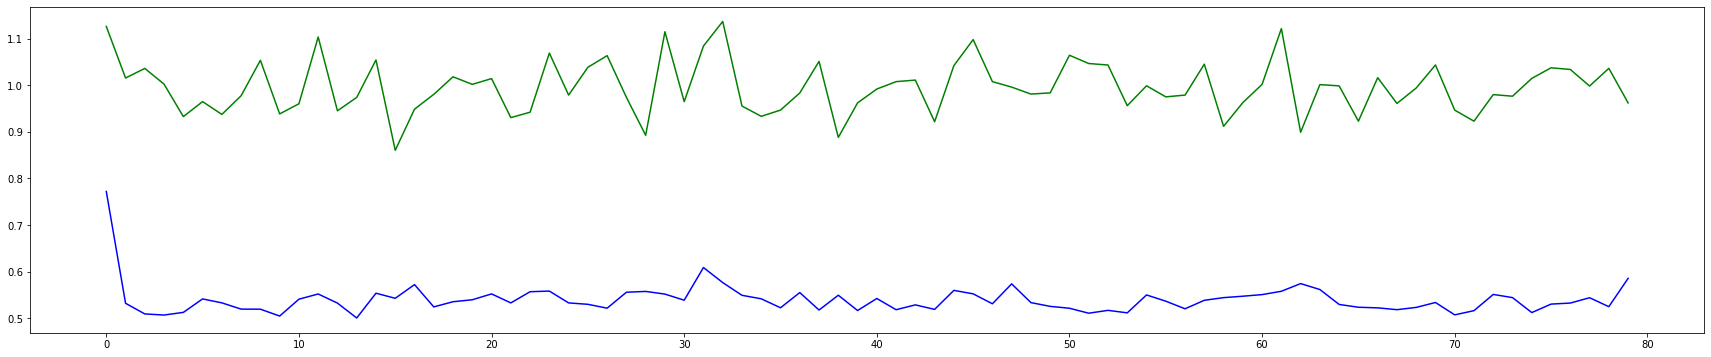

In [55]:
plt.plot(r.history['loss'] , color = 'blue')
plt.plot(r.history['val_loss'] , color = 'green')


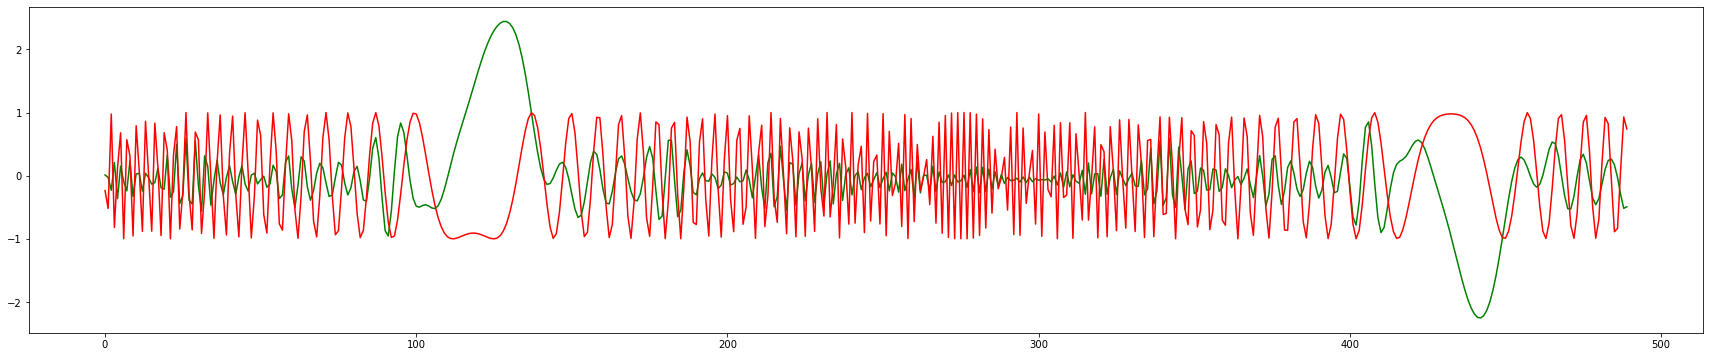

In [56]:
val_target = Y[N//2:]
val_forecast = []

i = N//2 
while len(val_forecast) < len(val_target):
    p = model.predict(X[i].reshape(1,-1))[0,0]  # 1x1 array -> scalar
    i+=1
    val_forecast.append(p)
    
plt.plot(val_forecast , label = 'val_forecast' , color ='green')
plt.plot(val_target , label = 'val_target' , color ='red')

In [24]:
## Don't even need to look at multistep prediction ; given how horrible even single step prediction is

# Simple RNN model

In [57]:
T = 20

X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [58]:
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

In [59]:
X.shape

(980, 20, 1)

In [60]:
import tensorflow as tf 
i = Input(shape=(X[0].shape))
x = SimpleRNN(40 , activation='tanh')(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001) , loss = 'mse' )

r = model.fit(X[:N//2] , Y[: N//2] , epochs = 80 , validation_data = (X[N//2:] , Y[N//2 :]) )

Epoch 1/80
16/16 [==============================] - 0s 16ms/step - loss: 0.5766 - val_loss: 0.5535
Epoch 2/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4584 - val_loss: 0.5585
Epoch 3/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4238 - val_loss: 0.5643
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4090 - val_loss: 0.5631
Epoch 5/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3916 - val_loss: 0.5605
Epoch 6/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3712 - val_loss: 0.5510
Epoch 7/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3515 - val_loss: 0.5429
Epoch 8/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3292 - val_loss: 0.5227
Epoch 9/80
16/16 [==============================] - 0s 6ms/step - loss: 0.3096 - val_loss: 0.4986
Epoch 10/80
16/16 [==============================] - 0s 6ms/step - loss: 0.2798 - val_loss: 0.4656
Epoch 11/80
16/16 

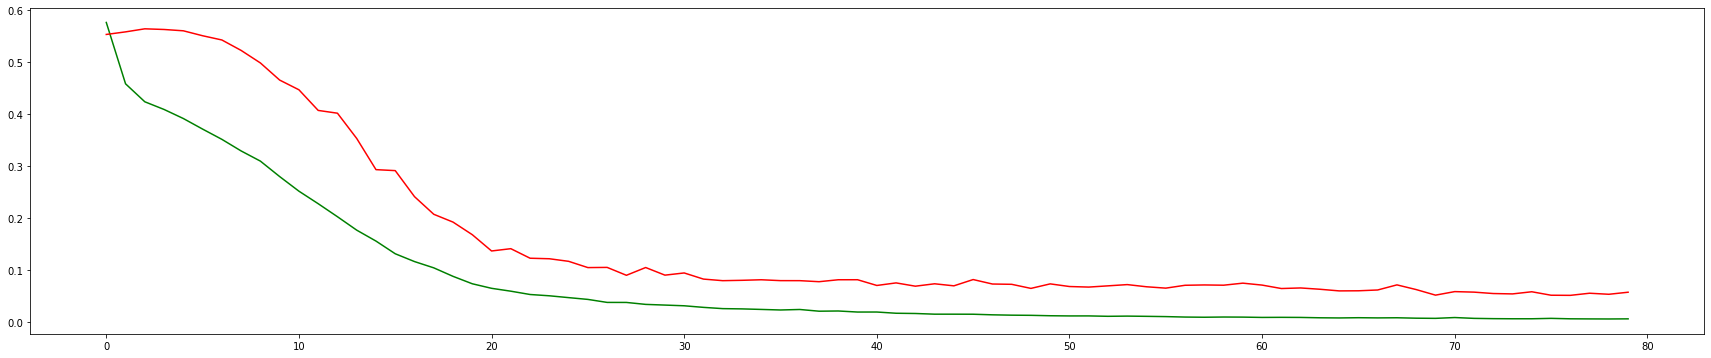

In [61]:
plt.plot(r.history['loss'] , color = 'green')
plt.plot(r.history['val_loss'] , color = 'red')

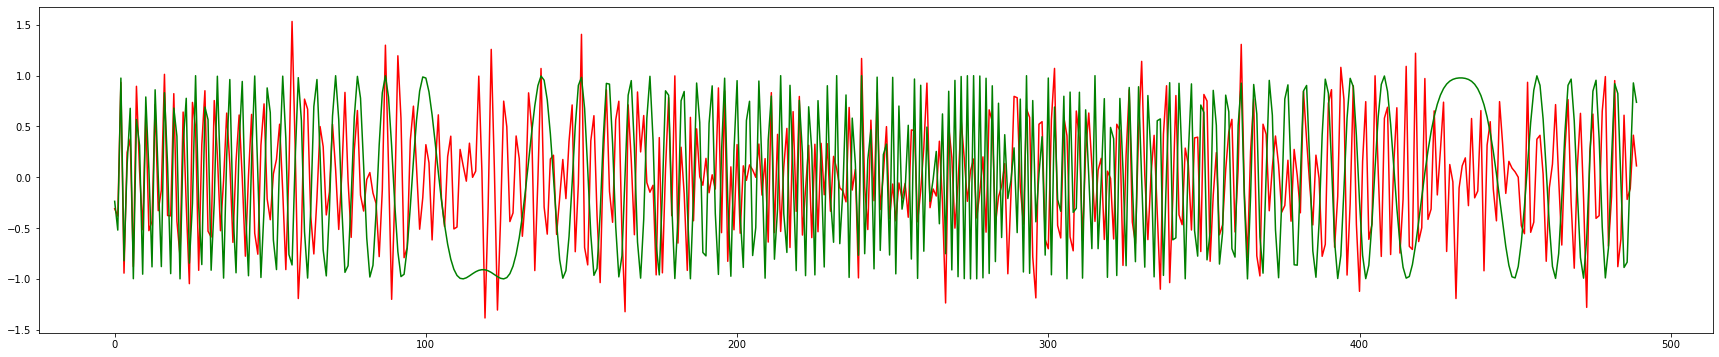

In [62]:
pred_vals = []
target_vals = Y[N//2:]

x_last = X[N//2]

while len(pred_vals) < len(target_vals):
    p = model.predict(x_last.reshape(-1,T,1))[0,0]
    pred_vals.append(p)
    x_last = np.roll(x_last , -1)
    x_last[-1] = p
    
plt.plot(pred_vals , color = 'red')
plt.plot(target_vals , color = 'green')

## LSTM

In [63]:
T = 10

X = []
Y = []
for t in range(len(series)-T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

In [64]:
X = np.array(X).reshape(-1,T,1)
Y = np.array(Y)

In [70]:
import tensorflow as tf 
i = Input(shape=(X[0].shape))
x = LSTM(40 , activation='relu')(i)
x = Dense(1)(x)

model = Model(i,x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001) , loss = 'mse' )

r = model.fit(X[:N//2] , Y[: N//2] , epochs = 80 , validation_data = (X[N//2:] , Y[N//2 :]) )

Epoch 1/80
16/16 [==============================] - 0s 20ms/step - loss: 0.5018 - val_loss: 0.5331
Epoch 2/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4956 - val_loss: 0.5420
Epoch 3/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4920 - val_loss: 0.5550
Epoch 4/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4887 - val_loss: 0.5702
Epoch 5/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4862 - val_loss: 0.6133
Epoch 6/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4794 - val_loss: 0.6734
Epoch 7/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4699 - val_loss: 1.5419
Epoch 8/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4618 - val_loss: 2.8957
Epoch 9/80
16/16 [==============================] - 0s 6ms/step - loss: 0.4482 - val_loss: 6.2173
Epoch 10/80
16/16 [==============================] - 0s 7ms/step - loss: 0.4460 - val_loss: 6.5504
Epoch 11/80
16/16 

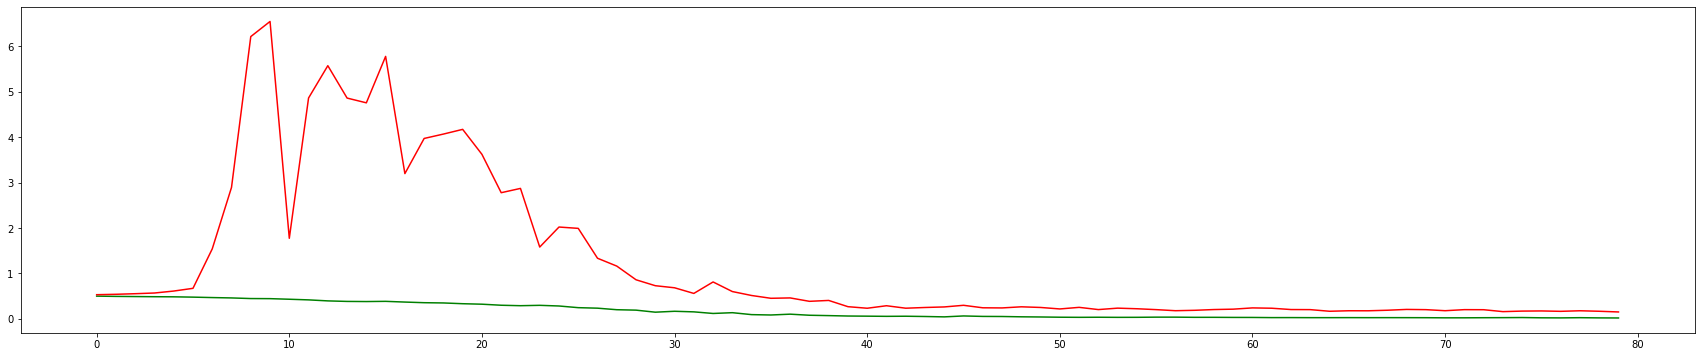

In [71]:
plt.plot(r.history['loss'] , color = 'green')
plt.plot(r.history['val_loss'] , color = 'red')

In [68]:
pred_vals = []
target_vals = Y[N//2:]

x_last = X[N//2]

while len(pred_vals) < len(target_vals):
    p = model.predict(x_last.reshape(-1,T,1))[0,0]
    pred_vals.append(p)
    x_last = np.roll(x_last , -1)
    x_last[-1] = p

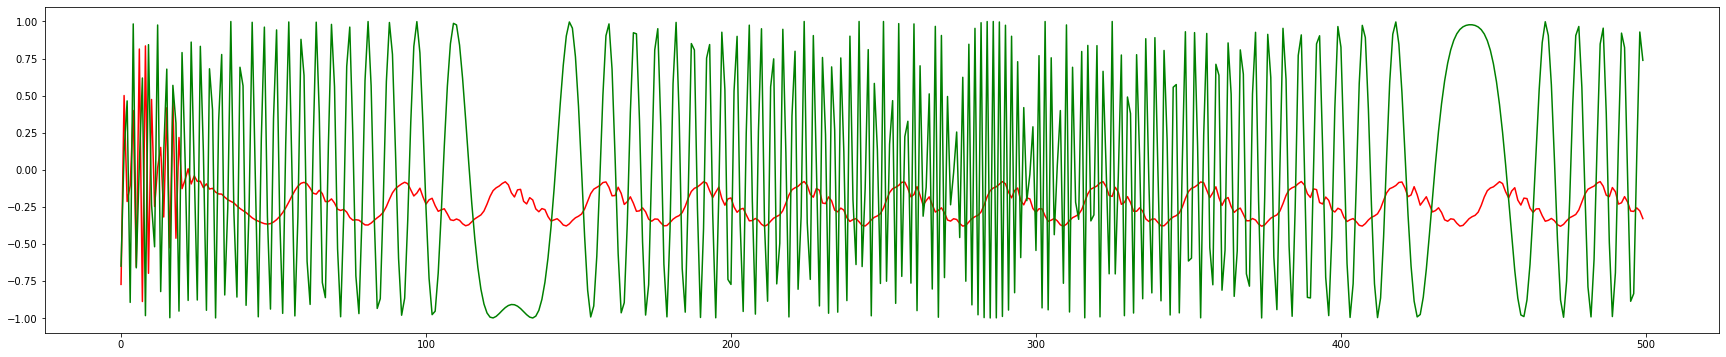

In [69]:
plt.plot(pred_vals , color = 'red')
plt.plot(target_vals , color = 'green')